# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from tennis.maddpg_agent import MADDPG
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../unity/Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
#env.close()


# Training



In [7]:
state_dim = int(env_info.vector_observations.shape[1])
action_dim = int(brain.vector_action_space_size)

In [8]:
random_seed = round(np.random.rand() * 100)
print(f"Random seed value: {random_seed}")


Random seed value: 66


In [9]:
agent = MADDPG(num_agents,state_dim,action_dim,random_seed)

In [10]:
def train(n_episodes=2_000,print_every=100):
    scores_window = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores_episodes = np.zeros(num_agents)
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states,actions,rewards,next_states,dones)
            scores_episodes += rewards
            states = next_states

            if np.any(dones):
                break
        score = np.max(scores_episodes)
        scores_window.append(score)
        scores.append(score)

        print('\rEpisode {}\tAverage Score: {:.4f}\tCurrent Score: {:.4f}\t Max Score: {:.4f}'
              .format(i_episode, np.mean(scores_window), score, np.max(scores_window)), end="")

        # Save checkpoint every 100 episodes
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
            agent.saveCheckPoints(False)

        #break training if env solved
        if np.mean(scores_window) >= 0.5:
            agent.saveCheckPoints(True)
            break
    np.savez('../scores/scores_train.npz', scores)
    return scores

In [11]:
%timeit
print("Start Training")
scores = train(2000,100)
print("Training Completed")

Start Training
Episode 9	Average Score: 0.0000	Current Score: 0.0000	 Max Score: 0.0000

/Users/phani/KnowledgeBank/Udacity/Deep-Reinforcement-Learning/p3-ddpg-tennis/tennis/ddpg_agent.py:91: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(self.critic_local.parameters(),1)


Episode 100	Average Score: 0.0010	Current Score: 0.0000	 Max Score: 0.1000
Episode 200	Average Score: 0.0018	Current Score: 0.0000	 Max Score: 0.0900
Episode 300	Average Score: 0.0048	Current Score: 0.0000	 Max Score: 0.1000
Episode 400	Average Score: 0.0318	Current Score: 0.0900	 Max Score: 0.1000
Episode 500	Average Score: 0.0720	Current Score: 0.0000	 Max Score: 0.1000
Episode 600	Average Score: 0.0755	Current Score: 0.1000	 Max Score: 0.1000
Episode 700	Average Score: 0.0817	Current Score: 0.0000	 Max Score: 0.1000
Episode 800	Average Score: 0.0725	Current Score: 0.0900	 Max Score: 0.1000
Episode 900	Average Score: 0.0862	Current Score: 0.2000	 Max Score: 0.2000
Episode 1000	Average Score: 0.0970	Current Score: 0.1000	 Max Score: 0.3000
Episode 1100	Average Score: 0.0971	Current Score: 0.1000	 Max Score: 0.2000
Episode 1200	Average Score: 0.1200	Current Score: 0.1000	 Max Score: 0.3000
Episode 1300	Average Score: 0.2229	Current Score: 0.1000	 Max Score: 1.3000
Episode 1400	Average 

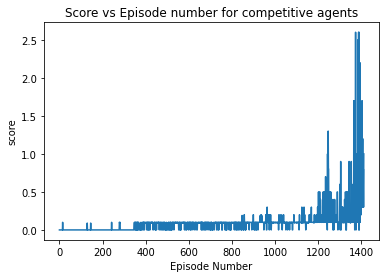

In [12]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel("Episode Number")
plt.ylabel("score")
plt.title("Score vs Episode number for competitive agents")
plt.show()


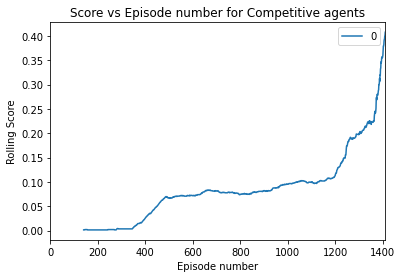

In [13]:
import pandas as pd
#perform rolling average
df = pd.DataFrame(scores)
df.rolling(window=round(0.1*len(scores))).mean().plot()
plt.xlabel("Episode number")
plt.ylabel("Rolling Score")
plt.title("Score vs Episode number for Competitive agents")
plt.show()


# Testing



In [18]:
agent = MADDPG(num_agents, state_dim, action_dim, random_seed)
#Load agent
agent.loadCheckPoints(isFinal=True)

In [19]:
def test(n_episodes=30):
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        #initialize score value calculations for 2 agents
        scores_episode = np.zeros(num_agents)

        while True:
            actions = agent.act(states)                   #get action from agent
            env_info = env.step(actions)[brain_name]      # send actions to the environment
            next_states = env_info.vector_observations    # get next states
            rewards = env_info.rewards                    # get rewards
            dones = env_info.local_done                   # see if episodes finished

            #Append stats
            scores_episode += rewards
            states = next_states

            #break if any agents are done
            if np.any(dones):
                break

        #calculate intermediate stats
        score = np.max(scores_episode)
        scores.append(score)

        #display current stats
        print('Episode {}\tAverage Score: {:.4f}\tCurrent Score: {:.4f}\t Max Score: {:.4f}'
              .format(i_episode, np.mean(scores), score, np.max(scores)))

    return scores


In [20]:
test_scores = test()


Episode 1	Average Score: 2.0000	Current Score: 2.0000	 Max Score: 2.0000
Episode 2	Average Score: 1.4500	Current Score: 0.9000	 Max Score: 2.0000
Episode 3	Average Score: 1.0000	Current Score: 0.1000	 Max Score: 2.0000
Episode 4	Average Score: 0.8225	Current Score: 0.2900	 Max Score: 2.0000
Episode 5	Average Score: 0.6780	Current Score: 0.1000	 Max Score: 2.0000
Episode 6	Average Score: 0.5817	Current Score: 0.1000	 Max Score: 2.0000
Episode 7	Average Score: 0.5129	Current Score: 0.1000	 Max Score: 2.0000
Episode 8	Average Score: 0.4988	Current Score: 0.4000	 Max Score: 2.0000
Episode 9	Average Score: 0.4878	Current Score: 0.4000	 Max Score: 2.0000
Episode 10	Average Score: 0.5190	Current Score: 0.8000	 Max Score: 2.0000
Episode 11	Average Score: 0.4900	Current Score: 0.2000	 Max Score: 2.0000
Episode 12	Average Score: 0.5325	Current Score: 1.0000	 Max Score: 2.0000
Episode 13	Average Score: 0.5677	Current Score: 0.9900	 Max Score: 2.0000
Episode 14	Average Score: 0.5629	Current Score:

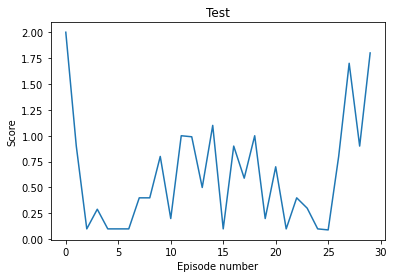

In [21]:
plt.plot(test_scores)
plt.xlabel("Episode number")
plt.ylabel("Score")
plt.title("Test")
plt.show()